In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import math
import numpy as np
import pandas as pd
import mlxtend
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn import model_selection


from mlxtend.classifier import StackingClassifier
#from sklearn import XGBClassifier
#from xgboost import XGBClassifier

## load data

In [10]:
%ls /Users/yiru/projects/Fashion_Project_18/data/embeddings

doc_style_embedding_nap.h5  tfidf_weights_nap.h5
tfidf_weights_df.h5         wv_embedding_200_nap.h5


In [34]:
datapath = '/Users/yiru/projects/Fashion_Project_18/data/embeddings/'
df=pd.read_hdf(datapath+'wv_embedding_200_nap.h5', 'table')

In [35]:
df[df['product_id'].isin(df_original['product_id'])][['product_id','tf_wv_desc_embedding_200_nap']]

,product_id,tf_wv_desc_embedding_200_nap
0,5b013e8c4500d65c4d2fa41b,"[0.024669377, -0.0049285544, 0.00094511727, -0..."
1,5b013e8d4500d65c4d2fa425,"[0.01456125, -0.0048520938, -0.004193153, -0.0..."
2,5b013e8e4500d65c4d2fa43d,"[0.00551367, -0.0064105573, 0.0039206864, -0.0..."
3,5b013e8e4500d65c4d2fa445,"[0.018165318, -0.0040821056, -0.0014719595, -0..."
4,5b013e8e4500d65c4d2fa446,"[0.012526386, -0.0047087525, 0.004192033, -0.0..."
5,5b013e8f4500d65c4d2fa45a,"[0.02521637, -0.007163938, -0.0011767752, -0.0..."
6,5b013e8f4500d65c4d2fa45b,"[0.011644115, -0.006797975, 0.002258105, -0.00..."
7,5b013e8f4500d65c4d2fa460,"[0.010549389, -0.0053413995, 0.0031645214, -0...."
8,5b013e8f4500d65c4d2fa461,"[0.0132017145, -0.002324929, 0.0034438393, -0...."
9,5b013e904500d65c4d2fa47c,"[0.011169956, -0.0037464255, 0.0026757102, -0...."


## split train test

In [36]:
data = df[df['label'].notnull()]

In [37]:
from collections import Counter
style_counts = [x for sublist in data['label'].tolist() for x in sublist]
style_dict=Counter(style_counts)
style_dict.most_common()

[('casual', 503),
 ('romantic', 397),
 ('artsy', 278),
 ('minimalistic', 212),
 ('sophisticated', 205),
 ('vintage', 195),
 ('tailored', 193),
 ('chic', 179),
 ('exotic', 179),
 ('athleisure', 168),
 ('business', 167),
 ('glam', 161),
 ('street', 149),
 ('sexy', 138),
 ('classic', 122),
 ('edgy', 96),
 ('bohemian', 76),
 ('sartorial', 72),
 ('punk', 57),
 ('western', 55),
 ('preppy', 42),
 ('rocker', 40),
 ('hipster', 23),
 ('gothic', 13)]

<BarContainer object of 24 artists>

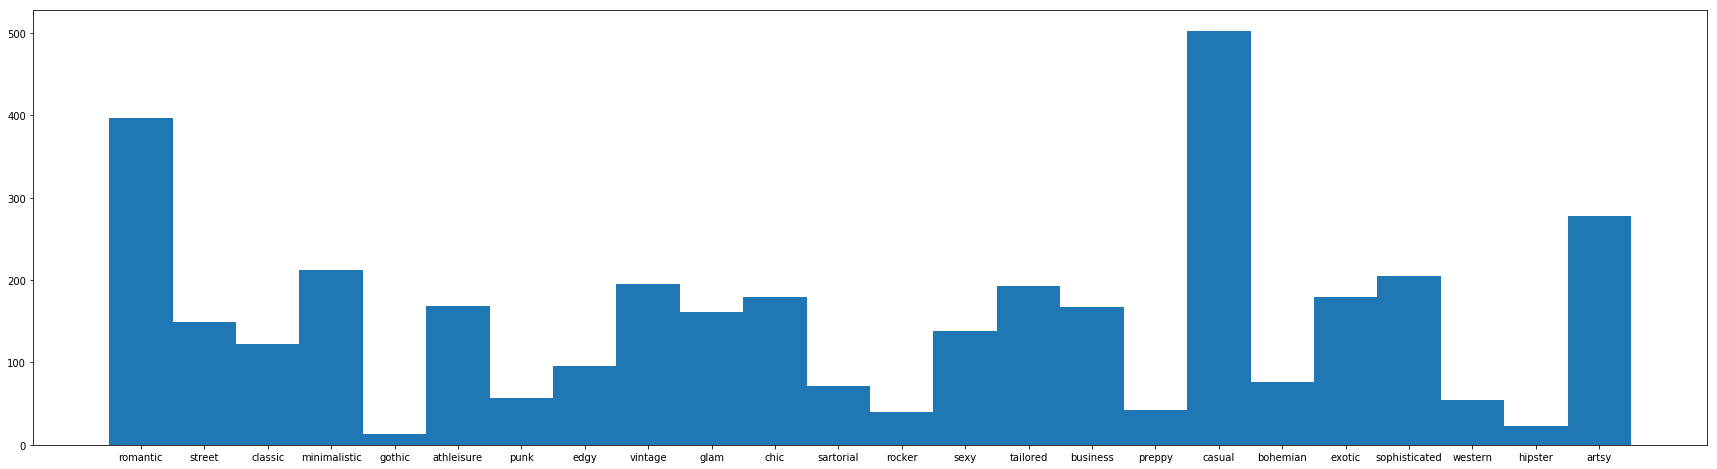

In [38]:
indexes = list(style_dict.keys())
labels, values = zip(*style_dict.items())

plt.figure(figsize=(30,8))
width = 1
plt.bar(indexes, values, width, align='center', )

# Multi-class classification

In [50]:
data['single_label'] = [x[0] for x in data['label']]

In [58]:
# Convert labels to k-hot
lb = LabelBinarizer()
Y_single = lb.fit_transform(data['single_label'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [59]:
embeddings = ['tf_wv_desc_embedding_200_nap']

In [60]:
# Select embeddings from dataframe
X = data[embeddings]

In [61]:
# 80/20 train/test
x_train, x_test, y_train, y_test = train_test_split(X, Y_single, test_size = 0.2, random_state = 2018)

In [71]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

for category in mlb.classes_:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, y_train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))

NameError: name 'MultinomialNB' is not defined

In [66]:
# Construct grid searches
jobs = -1

gs_lr_tf_idf = GridSearchCV(estimator=pipe_lr_tfidf,
        param_grid=grid_params_lr,
        scoring='precision',
        cv=5)

gs_lr = GridSearchCV(estimator=pipe_lr,
        param_grid=grid_params_lr,
        scoring='accuracy',
        cv=5) 

gs_rf = GridSearchCV(estimator=pipe_rf,
        param_grid=grid_params_rf,
        scoring='accuracy',
        cv=10, 
        n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
        param_grid=grid_params_svm,
        scoring='recall_micro',
        cv=10, 
        n_jobs=jobs)

gs_ada = GridSearchCV(
        estimator=pipe_ada,
        param_grid=grid_params_ada,
        scoring='recall_micro',
        cv=10, 
        n_jobs=jobs)

# gs_xgb = GridSearchCV(estimator=pipe_xgb,
#         param_grid=grid_params_xgb,
#         scoring='recall_micro',
#         cv=10, 
#         n_jobs=jobs)

# gs_rf.fit(np.vstack(x_train['tf_wv_desc_embedding']), y_train)
            # gs_rf.fit(d/ata['comb_desc'][:400], Y[:400])
            # gs_svm.fit(newdata, Y[:400])

In [69]:
%%time
gs_svm.fit(np.vstack(x_train['tf_wv_desc_embedding_200_nap']), y_train)
y_pred=gs_svm.predict(np.vstack(x_train['tf_wv_desc_embedding_200_nap']))

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/yiru/.pyenv/versions/3.6.1/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/yiru/.pyenv/versions/3.6.1/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x10971a9c0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/yiru/.pyenv/versions/fashion_project/lib/...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/yiru/.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x10971a9c0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/yiru/.pyenv/versions/fashion_project/lib/...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/yiru/.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
/Users/yiru/.pyenv/versions/3.6.1/lib/python3.6/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    416             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    417                                    finalizer=self._asyncgen_finalizer_hook)
    418         try:
    419             events._set_running_loop(self)
    420             while True:
--> 421                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    422                 if self._stopping:
    423                     break
    424         finally:
    425             self._stopping = False

...........................................................................
/Users/yiru/.pyenv/versions/3.6.1/lib/python3.6/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1420                         logger.warning('Executing %s took %.3f seconds',
   1421                                        _format_handle(handle), dt)
   1422                 finally:
   1423                     self._current_handle = None
   1424             else:
-> 1425                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(13, 1)>>
   1426         handle = None  # Needed to break cycles when an exception occurs.
   1427 
   1428     def _set_coroutine_wrapper(self, enabled):
   1429         try:

...........................................................................
/Users/yiru/.pyenv/versions/3.6.1/lib/python3.6/asyncio/events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(13, 1)>)
    122             self._callback = None
    123             self._args = None
    124 
    125     def _run(self):
    126         try:
--> 127             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (13, 1)
    128         except Exception as exc:
    129             cb = _format_callback_source(self._callback, self._args)
    130             msg = 'Exception in callback {}'.format(cb)
    131             context = {

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/tornado/platform/asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=13, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "%%time\ngs_svm.fit(np.vstack(x_train['tf_wv_desc_....vstack(x_train['tf_wv_desc_embedding_200_nap']))", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 8, 17, 38, 42, 592065, tzinfo=tzutc()), 'msg_id': 'c53c3ba560604d52aef0e562aaf564b3', 'msg_type': 'execute_request', 'session': 'e2675bfc17b843d384d1724201b99fce', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c53c3ba560604d52aef0e562aaf564b3', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'e2675bfc17b843d384d1724201b99fce']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "%%time\ngs_svm.fit(np.vstack(x_train['tf_wv_desc_....vstack(x_train['tf_wv_desc_embedding_200_nap']))", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 8, 17, 38, 42, 592065, tzinfo=tzutc()), 'msg_id': 'c53c3ba560604d52aef0e562aaf564b3', 'msg_type': 'execute_request', 'session': 'e2675bfc17b843d384d1724201b99fce', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c53c3ba560604d52aef0e562aaf564b3', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'e2675bfc17b843d384d1724201b99fce'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "%%time\ngs_svm.fit(np.vstack(x_train['tf_wv_desc_....vstack(x_train['tf_wv_desc_embedding_200_nap']))", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 8, 17, 38, 42, 592065, tzinfo=tzutc()), 'msg_id': 'c53c3ba560604d52aef0e562aaf564b3', 'msg_type': 'execute_request', 'session': 'e2675bfc17b843d384d1724201b99fce', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c53c3ba560604d52aef0e562aaf564b3', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="%%time\ngs_svm.fit(np.vstack(x_train['tf_wv_desc_....vstack(x_train['tf_wv_desc_embedding_200_nap']))", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "%%time\ngs_svm.fit(np.vstack(x_train['tf_wv_desc_....vstack(x_train['tf_wv_desc_embedding_200_nap']))"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("%%time\ngs_svm.fit(np.vstack(x_train['tf_wv_desc_....vstack(x_train['tf_wv_desc_embedding_200_nap']))",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("%%time\ngs_svm.fit(np.vstack(x_train['tf_wv_desc_....vstack(x_train['tf_wv_desc_embedding_200_nap']))",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="%%time\ngs_svm.fit(np.vstack(x_train['tf_wv_desc_....vstack(x_train['tf_wv_desc_embedding_200_nap']))", store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = "%%time\ngs_svm.fit(np.vstack(x_train['tf_wv_desc_....vstack(x_train['tf_wv_desc_embedding_200_nap']))"
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="%%time\ngs_svm.fit(np.vstack(x_train['tf_wv_desc_....vstack(x_train['tf_wv_desc_embedding_200_nap']))", store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-69-5d257ecdfa2e>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 112eed358, execution_...rue silent=False shell_futures=True> result=None>)
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])
   2908                 code = compiler(mod, cell_name, "single")
-> 2909                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1119de270, file "<ipython-input-69-5d257ecdfa2e>", line 1>
        result = <ExecutionResult object at 112eed358, execution_...rue silent=False shell_futures=True> result=None>
   2910                     return True
   2911 
   2912             # Flush softspace
   2913             if softspace(sys.stdout, 0):

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1119de270, file "<ipython-input-69-5d257ecdfa2e>", line 1>, result=<ExecutionResult object at 112eed358, execution_...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1119de270, file "<ipython-input-69-5d257ecdfa2e>", line 1>
        self.user_global_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'Counter': <class 'collections.Counter'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'HTML': <class 'IPython.core.display.HTML'>, 'In': ['', 'from IPython.core.display import display, HTML\nd...>.container { width:100% !important; }</style>"))', 'import sys\nsys.path', 'import math\nimport numpy as np\nimport pandas as ... XGBClassifier\n#from xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ... XGBClassifier\n#from xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ...t XGBClassifier\nfrom xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ...t XGBClassifier\nfrom xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ...t XGBClassifier\nfrom xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ...t XGBClassifier\nfrom xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ... XGBClassifier\n#from xgboost import XGBClassifier', "get_ipython().run_line_magic('ls', '/Users/yiru/projects/Fashion_Project_18/data/embeddings')", "datapath = '/Users/yiru/projects/Fashion_Project..._hdf(datapath+'wv_embedding_200_nap.h5', 'table')", 'df.head()', "data = df[df['label'].notnull()]", "# # gothic+punk+rocker -> punk\n\n# # tailored+bus...', 'tailored').split(' ') for x in data['label']]", 'from collections import Counter\nstyle_counts = [...ct=Counter(style_counts)\nstyle_dict.most_common()', 'from collections import Counter\nstyle_counts = [...ct=Counter(style_counts)\nstyle_dict.most_common()', "indexes = list(style_dict.keys())\nlabels, values...plt.bar(indexes, values, width, align='center', )", "data['label'].sample(10)", "# Convert labels to k-hot\nmlb = MultiLabelBinarizer()\nY = mlb.fit_transform(data['label'])", ...], 'LabelBinarizer': <class 'sklearn.preprocessing.label.LabelBinarizer'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, ...}
        self.user_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'Counter': <class 'collections.Counter'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'HTML': <class 'IPython.core.display.HTML'>, 'In': ['', 'from IPython.core.display import display, HTML\nd...>.container { width:100% !important; }</style>"))', 'import sys\nsys.path', 'import math\nimport numpy as np\nimport pandas as ... XGBClassifier\n#from xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ... XGBClassifier\n#from xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ...t XGBClassifier\nfrom xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ...t XGBClassifier\nfrom xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ...t XGBClassifier\nfrom xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ...t XGBClassifier\nfrom xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ... XGBClassifier\n#from xgboost import XGBClassifier', "get_ipython().run_line_magic('ls', '/Users/yiru/projects/Fashion_Project_18/data/embeddings')", "datapath = '/Users/yiru/projects/Fashion_Project..._hdf(datapath+'wv_embedding_200_nap.h5', 'table')", 'df.head()', "data = df[df['label'].notnull()]", "# # gothic+punk+rocker -> punk\n\n# # tailored+bus...', 'tailored').split(' ') for x in data['label']]", 'from collections import Counter\nstyle_counts = [...ct=Counter(style_counts)\nstyle_dict.most_common()', 'from collections import Counter\nstyle_counts = [...ct=Counter(style_counts)\nstyle_dict.most_common()', "indexes = list(style_dict.keys())\nlabels, values...plt.bar(indexes, values, width, align='center', )", "data['label'].sample(10)", "# Convert labels to k-hot\nmlb = MultiLabelBinarizer()\nY = mlb.fit_transform(data['label'])", ...], 'LabelBinarizer': <class 'sklearn.preprocessing.label.LabelBinarizer'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
/Users/yiru/projects/Fashion_Project_18/notebooks/<ipython-input-69-5d257ecdfa2e> in <module>()
----> 1 get_ipython().run_cell_magic('time', '', "gs_svm.fit(np.vstack(x_train['tf_wv_desc_embedding_200_nap']), y_train)\ny_pred=gs_svm.predict(np.vstack(x_train['tf_wv_desc_embedding_200_nap']))")

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell_magic(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, magic_name='time', line='', cell="gs_svm.fit(np.vstack(x_train['tf_wv_desc_embeddi....vstack(x_train['tf_wv_desc_embedding_200_nap']))")
   2162             # This will need to be updated if the internal calling logic gets
   2163             # refactored, or else we'll be expanding the wrong variables.
   2164             stack_depth = 2
   2165             magic_arg_s = self.var_expand(line, stack_depth)
   2166             with self.builtin_trap:
-> 2167                 result = fn(magic_arg_s, cell)
        result = undefined
        fn = <bound method ExecutionMagics.time of <IPython.core.magics.execution.ExecutionMagics object>>
        magic_arg_s = ''
        cell = "gs_svm.fit(np.vstack(x_train['tf_wv_desc_embeddi....vstack(x_train['tf_wv_desc_embedding_200_nap']))"
   2168             return result
   2169 
   2170     def find_line_magic(self, magic_name):
   2171         """Find and return a line magic by name.

...........................................................................
/Users/yiru/projects/Fashion_Project_18/notebooks/<decorator-gen-62> in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='', cell="gs_svm.fit(np.vstack(x_train['tf_wv_desc_embeddi....vstack(x_train['tf_wv_desc_embedding_200_nap']))", local_ns=None)

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/IPython/core/magic.py in <lambda>(f=<function ExecutionMagics.time>, *a=(<IPython.core.magics.execution.ExecutionMagics object>, '', "gs_svm.fit(np.vstack(x_train['tf_wv_desc_embeddi....vstack(x_train['tf_wv_desc_embedding_200_nap']))", None), **k={})
    182     validate_type(magic_kind)
    183 
    184     # This is a closure to capture the magic_kind.  We could also use a class,
    185     # but it's overkill for just that one bit of state.
    186     def magic_deco(arg):
--> 187         call = lambda f, *a, **k: f(*a, **k)
        f = <function ExecutionMagics.time>
        a = (<IPython.core.magics.execution.ExecutionMagics object>, '', "gs_svm.fit(np.vstack(x_train['tf_wv_desc_embeddi....vstack(x_train['tf_wv_desc_embedding_200_nap']))", None)
        k = {}
    188 
    189         if callable(arg):
    190             # "Naked" decorator call (just @foo, no args)
    191             func = arg

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/IPython/core/magics/execution.py in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='', cell="gs_svm.fit(np.vstack(x_train['tf_wv_desc_embeddi....vstack(x_train['tf_wv_desc_embedding_200_nap']))", local_ns=None)
   1233                 return
   1234             end = clock2()
   1235         else:
   1236             st = clock2()
   1237             try:
-> 1238                 exec(code, glob, local_ns)
        code = <code object <module> at 0x112efee40, file "<timed exec>", line 1>
        glob = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'Counter': <class 'collections.Counter'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'HTML': <class 'IPython.core.display.HTML'>, 'In': ['', 'from IPython.core.display import display, HTML\nd...>.container { width:100% !important; }</style>"))', 'import sys\nsys.path', 'import math\nimport numpy as np\nimport pandas as ... XGBClassifier\n#from xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ... XGBClassifier\n#from xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ...t XGBClassifier\nfrom xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ...t XGBClassifier\nfrom xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ...t XGBClassifier\nfrom xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ...t XGBClassifier\nfrom xgboost import XGBClassifier', 'import math\nimport numpy as np\nimport pandas as ... XGBClassifier\n#from xgboost import XGBClassifier', "get_ipython().run_line_magic('ls', '/Users/yiru/projects/Fashion_Project_18/data/embeddings')", "datapath = '/Users/yiru/projects/Fashion_Project..._hdf(datapath+'wv_embedding_200_nap.h5', 'table')", 'df.head()', "data = df[df['label'].notnull()]", "# # gothic+punk+rocker -> punk\n\n# # tailored+bus...', 'tailored').split(' ') for x in data['label']]", 'from collections import Counter\nstyle_counts = [...ct=Counter(style_counts)\nstyle_dict.most_common()', 'from collections import Counter\nstyle_counts = [...ct=Counter(style_counts)\nstyle_dict.most_common()', "indexes = list(style_dict.keys())\nlabels, values...plt.bar(indexes, values, width, align='center', )", "data['label'].sample(10)", "# Convert labels to k-hot\nmlb = MultiLabelBinarizer()\nY = mlb.fit_transform(data['label'])", ...], 'LabelBinarizer': <class 'sklearn.preprocessing.label.LabelBinarizer'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, ...}
        local_ns = None
   1239             except:
   1240                 self.shell.showtraceback()
   1241                 return
   1242             end = clock2()

...........................................................................
/Users/yiru/projects/Fashion_Project_18/notebooks/<timed exec> in <module>()

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=10, error_score='raise',
       ...'warn',
       scoring='recall_micro', verbose=0), X=array([[ 0.01767812, -0.00841559, -0.00030525, ....        0.05616832, -0.01905157]], dtype=float32), y=array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0,..., ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=10, random_state=None, shuffle=False)>
        X = array([[ 0.01767812, -0.00841559, -0.00030525, ....        0.05616832, -0.01905157]], dtype=float32)
        y = array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0,..., ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sun Sep  9 01:38:42 2018
PID: 32988Python 3.6.1: /Users/yiru/.pyenv/versions/fashion_project/bin/python
...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('clf', Linear..., random_state=42, tol=0.0001,
     verbose=0))]), memmap([[ 0.01767812, -0.00841559, -0.00030525, ...        0.05616832, -0.01905157]], dtype=float32), array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0,..., ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), {'score': make_scorer(recall_score, pos_label=None, average=micro)}, array([ 140,  141,  142, ..., 1388, 1389, 1390]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...30, 131, 132, 133, 134, 135, 136, 137, 138, 139]), 0, {'clf__C': 1, 'clf__kernel': 'linear'}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('clf', Linear..., random_state=42, tol=0.0001,
     verbose=0))]), memmap([[ 0.01767812, -0.00841559, -0.00030525, ...        0.05616832, -0.01905157]], dtype=float32), array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0,..., ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), {'score': make_scorer(recall_score, pos_label=None, average=micro)}, array([ 140,  141,  142, ..., 1388, 1389, 1390]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...30, 131, 132, 133, 134, 135, 136, 137, 138, 139]), 0, {'clf__C': 1, 'clf__kernel': 'linear'})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('clf', Linear..., random_state=42, tol=0.0001,
     verbose=0))]), X=memmap([[ 0.01767812, -0.00841559, -0.00030525, ...        0.05616832, -0.01905157]], dtype=float32), y=array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0,..., ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), scorer={'score': make_scorer(recall_score, pos_label=None, average=micro)}, train=array([ 140,  141,  142, ..., 1388, 1389, 1390]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...30, 131, 132, 133, 134, 135, 136, 137, 138, 139]), verbose=0, parameters={'clf__C': 1, 'clf__kernel': 'linear'}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method Pipeline.set_params of Pipeline(me... random_state=42, tol=0.0001,
     verbose=0))])>
        parameters = {'clf__C': 1, 'clf__kernel': 'linear'}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/sklearn/pipeline.py in set_params(self=Pipeline(memory=None,
     steps=[('clf', Linear..., random_state=42, tol=0.0001,
     verbose=0))]), **kwargs={'clf__C': 1, 'clf__kernel': 'linear'})
    137 
    138         Returns
    139         -------
    140         self
    141         """
--> 142         self._set_params('steps', **kwargs)
        self._set_params = <bound method _BaseComposition._set_params of Pi... random_state=42, tol=0.0001,
     verbose=0))])>
        kwargs = {'clf__C': 1, 'clf__kernel': 'linear'}
    143         return self
    144 
    145     def _validate_steps(self):
    146         names, estimators = zip(*self.steps)

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/sklearn/utils/metaestimators.py in _set_params(self=Pipeline(memory=None,
     steps=[('clf', Linear..., random_state=42, tol=0.0001,
     verbose=0))]), attr='steps', **params={'clf__C': 1, 'clf__kernel': 'linear'})
     44         names, _ = zip(*getattr(self, attr))
     45         for name in list(six.iterkeys(params)):
     46             if '__' not in name and name in names:
     47                 self._replace_estimator(attr, name, params.pop(name))
     48         # 3. Step parameters and other initilisation arguments
---> 49         super(_BaseComposition, self).set_params(**params)
        self.set_params = <bound method Pipeline.set_params of Pipeline(me... random_state=42, tol=0.0001,
     verbose=0))])>
        params = {'clf__C': 1, 'clf__kernel': 'linear'}
     50         return self
     51 
     52     def _replace_estimator(self, attr, name, new_val):
     53         # assumes `name` is a valid estimator name

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/sklearn/base.py in set_params(self=Pipeline(memory=None,
     steps=[('clf', Linear..., random_state=42, tol=0.0001,
     verbose=0))]), **params={'clf__C': 1, 'clf__kernel': 'linear'})
    277                 nested_params[key][sub_key] = value
    278             else:
    279                 setattr(self, key, value)
    280 
    281         for key, sub_params in nested_params.items():
--> 282             valid_params[key].set_params(**sub_params)
        valid_params = {'clf': LinearSVC(C=1, class_weight=None, dual=True, fit...l2', random_state=42, tol=0.0001,
     verbose=0), 'clf__C': 1.0, 'clf__class_weight': None, 'clf__dual': True, 'clf__fit_intercept': True, 'clf__intercept_scaling': 1, 'clf__loss': 'squared_hinge', 'clf__max_iter': 1000, 'clf__multi_class': 'ovr', 'clf__penalty': 'l2', ...}
        key.set_params = undefined
        sub_params = {'C': 1, 'kernel': 'linear'}
    283 
    284         return self
    285 
    286     def __repr__(self):

...........................................................................
/Users/yiru/.pyenv/versions/fashion_project/lib/python3.6/site-packages/sklearn/base.py in set_params(self=LinearSVC(C=1, class_weight=None, dual=True, fit...l2', random_state=42, tol=0.0001,
     verbose=0), **params={'C': 1, 'kernel': 'linear'})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'kernel'
        self = LinearSVC(C=1, class_weight=None, dual=True, fit...l2', random_state=42, tol=0.0001,
     verbose=0)
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter kernel for estimator LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

# Multi-label Classification

### target

In [19]:
 # Convert labels to k-hot
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(data['label'])

In [20]:
mlb.classes_

array(['artsy', 'athleisure', 'bohemian', 'business', 'casual', 'chic',
       'classic', 'edgy', 'exotic', 'glam', 'gothic', 'hipster',
       'minimalistic', 'preppy', 'punk', 'rocker', 'romantic',
       'sartorial', 'sexy', 'sophisticated', 'street', 'tailored',
       'vintage', 'western'], dtype=object)

In [21]:
embeddings = ['tf_wv_desc_embedding_200_nap']

In [22]:
# Select embeddings from dataframe
X = data[embeddings]

In [23]:
# 80/20 train/test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2018)

In [24]:
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [25]:
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 2018)
# x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

## metrics

In [26]:
def eval(predict_label_and_marked_label_list):
    right_label_num = 0  #total correct label nums
    right_label_at_pos_num = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  #on each position the total correct labels
    sample_num = 0   #
    all_marked_label_num = 0    #all style labels nums
    for predict_labels, marked_labels in predict_label_and_marked_label_list:
        sample_num += 1
        marked_label_set = set(marked_labels)
        all_marked_label_num += len(marked_label_set)
        for pos, label in zip(range(0, min(len(predict_labels), 10)), predict_labels):
            if label in marked_label_set:     #correct
                right_label_num += 1
                right_label_at_pos_num[pos] += 1

    precision = 0.0
    for pos, right_num in zip(range(0, 10), right_label_at_pos_num):
        precision += ((right_num / float(sample_num))) / math.log(2.0 + pos)  # 0-4 -> pos1-5 + 1，so +2
    recall = float(right_label_num) / all_marked_label_num

    return 2*(precision * recall) / (precision + recall+0.00001)

##  model selection

In [22]:
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import LinearSVC

# Construct some pipelines

pipe_lr_tfidf = Pipeline([('tf', TfidfVectorizer()), ('clf', OneVsRestClassifier(LogisticRegression(random_state=42)))])

pipe_lr = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(random_state=42)))])

pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('clf', OneVsRestClassifier(LinearSVC(random_state=42)))])

pipe_ada = Pipeline([('ada', OneVsRestClassifier(AdaBoostClassifier()))])

#pipe_xgb = Pipeline([('xgb', OneVsRestClassifier(XGBClassifier()))])


# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__estimator__penalty': ['l1', 'l2'],
                    'clf__estimator__C': range(1,50,10)}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                    'clf__min_samples_leaf': range(1,20,1),
                    'clf__max_depth': param_range,
                    'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
                    'clf__C': param_range}]

grid_params_ada = [{'ada__estimator__n_estimators': [50,100,200]}]

#grid_params_xgb = [{'xgb__estimator__n_estimators': [50,100,200, 300, ],}]

'accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score'

In [23]:
# Construct grid searches
jobs = -1

# gs_lr_tf_idf = GridSearchCV(estimator=pipe_lr_tfidf,
#         param_grid=grid_params_lr,
#         scoring='precision',
#         cv=5)

# gs_lr = GridSearchCV(estimator=pipe_lr,
#         param_grid=grid_params_lr,
#         scoring='accuracy',
#         cv=5) 

# gs_rf = GridSearchCV(estimator=pipe_rf,
#         param_grid=grid_params_rf,
#         scoring='accuracy',
#         cv=10, 
#         n_jobs=jobs)

# gs_svm = GridSearchCV(estimator=pipe_svm,
#         param_grid=grid_params_svm,
#         scoring='recall_micro',
#         cv=10, 
#         n_jobs=jobs)

# gs_ada = GridSearchCV(
#         estimator=pipe_ada,
#         param_grid=grid_params_ada,
#         scoring='recall_micro',
#         cv=10, 
#         n_jobs=jobs)

gs_xgb = GridSearchCV(estimator=pipe_xgb,
        param_grid=grid_params_xgb,
        scoring='recall_micro',
        cv=10, 
        n_jobs=jobs)

# gs_rf.fit(np.vstack(x_train['tf_wv_desc_embedding']), y_train)
            # gs_rf.fit(d/ata['comb_desc'][:400], Y[:400])
            # gs_svm.fit(newdata, Y[:400])

In [24]:
%%time
gs_xgb.fit(np.vstack(x_train['tf_wv_desc_embedding_200_nap']), y_train)
y_pred=gs_xgb.predict(np.vstack(x_train['tf_wv_desc_embedding_200_nap']))

CPU times: user 59.6 s, sys: 139 ms, total: 59.7 s
Wall time: 3min 26s


In [91]:
print(classification_report(y_pred=gs_xgb.predict(np.vstack(x_train['tf_wv_desc_embedding_200_nap'])), y_true=y_train, target_names=mlb.classes_))

               precision    recall  f1-score   support

        artsy       0.89      1.00      0.94       227
   athleisure       1.00      1.00      1.00       130
     bohemian       1.00      0.54      0.70        63
     business       1.00      1.00      1.00       139
       casual       0.98      0.99      0.98       394
         chic       0.95      0.96      0.96       151
      classic       1.00      1.00      1.00        94
         edgy       1.00      0.99      0.99        71
       exotic       0.96      1.00      0.98       136
         glam       1.00      1.00      1.00       128
       gothic       1.00      1.00      1.00         9
      hipster       1.00      0.62      0.77        16
 minimalistic       0.99      0.96      0.98       173
       preppy       1.00      1.00      1.00        29
         punk       1.00      0.86      0.93        44
       rocker       1.00      1.00      1.00        29
     romantic       0.98      1.00      0.99       322
    sarto

In [162]:
y_pred_prob=gs_xgb.predict_proba(np.vstack(x_train['tf_wv_desc_embedding_200_nap']))

n=3 #get best five style labels
best_n = np.argsort(y_pred_prob, axis=1)[:,:n]
best_n

array([[ 6, 10, 23],
       [23,  7, 13],
       [ 9, 10,  7],
       ...,
       [14, 13, 10],
       [13, 23, 10],
       [14, 21, 23]])

In [120]:
print(classification_report(y_pred=gs_xgb.predict(np.vstack(x_test['tf_wv_desc_embedding_200_nap'])), y_true=y_test, target_names=mlb.classes_))

               precision    recall  f1-score   support

        artsy       0.72      0.35      0.47        51
   athleisure       0.91      0.26      0.41        38
     bohemian       0.00      0.00      0.00        13
     business       0.14      0.04      0.06        28
       casual       0.54      0.39      0.46       109
         chic       0.33      0.07      0.12        28
      classic       0.80      0.14      0.24        28
         edgy       0.00      0.00      0.00        25
       exotic       0.87      0.47      0.61        43
         glam       0.77      0.52      0.62        33
       gothic       0.00      0.00      0.00         4
      hipster       0.00      0.00      0.00         7
 minimalistic       0.18      0.05      0.08        39
       preppy       0.00      0.00      0.00        13
         punk       1.00      0.15      0.27        13
       rocker       0.00      0.00      0.00        11
     romantic       0.59      0.23      0.33        75
    sarto

/home/ubuntu/.virtualenvs/hana/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [168]:
n=7 #get best five style labels

y_pred_prob=gs_xgb.predict(np.vstack(x_test['tf_wv_desc_embedding_200_nap']))
best_n = np.argsort(y_pred_prob, axis=1)[:,:n]
best_n

array([[ 0, 21, 20, ..., 18, 17, 16],
       [ 0, 21, 20, ..., 18, 17, 16],
       [ 0, 20, 19, ..., 17, 16, 15],
       ...,
       [ 0, 21, 20, ..., 18, 17, 16],
       [ 0, 21, 20, ..., 18, 17, 16],
       [ 0, 21, 20, ..., 18, 17, 16]])

In [50]:
{k: v for v, k in enumerate(list(mlb.classes_))}

{'artsy': 0,
 'athleisure': 1,
 'bohemian': 2,
 'business': 3,
 'casual': 4,
 'chic': 5,
 'classic': 6,
 'edgy': 7,
 'exotic': 8,
 'glam': 9,
 'gothic': 10,
 'hipster': 11,
 'minimalistic': 12,
 'preppy': 13,
 'punk': 14,
 'rocker': 15,
 'romantic': 16,
 'sartorial': 17,
 'sexy': 18,
 'sophisticated': 19,
 'street': 20,
 'tailored': 21,
 'vintage': 22,
 'western': 23}

In [60]:
y_test_reallabels = mlb.inverse_transform(y_test)
y_test_reallabels=pd.Series(y_test_reallabels)

In [71]:
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('artsy', '0') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('athleisure', '1') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('bohemian', '2') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('business', '3') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('casual', '4') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('chic', '5') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('classic', '6') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('edgy', '7') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('exotic', '8') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('glam', '9') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('gothic', '10') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('hipster', '11') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('minimalistic', '12') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('preppy', '13') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('punk', '14') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('rocker', '15') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('romantic', '16') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('sartorial', '17') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('sexy', '18') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('sophisticated', '19') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('street', '20') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('tailored', '21') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('vintage', '22') for w in list(row)])
y_test_reallabels=y_test_reallabels.apply(lambda row: [w.replace('western', '23') for w in list(row)])

In [169]:
best_df = pd.Series( (v for v in best_n) )

In [170]:
merged_res = pd.concat([best_df, y_test_reallabels], axis=1).apply(lambda r: (r[0].tolist(),r[1]), axis=1)

In [171]:
res = eval(list(merged_res))
res

0.0

In [34]:
# res=gs_xgb.predict(np.vstack(x_test['tf_wv_desc_embedding_200_nap']))
# res[:10]

In [130]:
np.mean(gs_xgb.predict(np.vstack(x_test['tf_wv_desc_embedding_200_nap']))==y_test)

0.9176245210727969